In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
plt.style.use('seaborn-notebook')
params = {'legend.fontsize': 12,
          'legend.title_fontsize': 10,
          'figure.figsize': (10, 5),
         'axes.labelsize': 15,
         'axes.titlesize':18,
         'xtick.labelsize':15,
         'ytick.labelsize':15}
plt.rcParams.update(params)
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_feature = pd.read_csv("Features data set.csv")
df_sales = pd.read_csv("sales data-set.csv")
df_stores = pd.read_csv("stores data-set.csv")

In [3]:
df_feature[df_feature['Store'] == 1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,28/06/2013,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
178,1,05/07/2013,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
179,1,12/07/2013,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False
180,1,19/07/2013,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,NaN,NaN,False


In [4]:
df_sales[df_sales['Store'] == 1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
10239,1,99,31/08/2012,20.06,False
10240,1,99,07/09/2012,0.05,True
10241,1,99,14/09/2012,0.03,False
10242,1,99,05/10/2012,635.00,False


In [5]:
df_sales.Date = pd.to_datetime(df_sales.Date)
df_feature.Date = pd.to_datetime(df_feature.Date)

df_sales = df_sales.sort_values('Date')
df_feature = df_feature.sort_values('Date')



In [6]:
df_feature = df_feature.merge(df_stores, on = 'Store')

In [7]:
df_feature = df_feature[df_feature.Date.dt.date <= df_sales.Date.dt.date.max()]

In [8]:
df = df_sales.merge(df_feature, on = ['Store','Date'], how = 'left')
df = df.drop('IsHoliday_x', axis = 1)
# df=df.fillna(0)

In [9]:
df.columns = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size']

In [10]:
df['Year'] = df.Date.apply(lambda x: int(str(x)[:4]))
df['Month'] = df.Date.apply(lambda x: int(str(x)[5:7]))
df['Year-Month'] = df.Date.apply(lambda x: str(x)[:7])
df['Day'] = df.Date.apply(lambda x: int(str(x)[8:10]))

In [11]:
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Year-Month,Day
0,33,96,2010-01-10,7854.09,91.45,3.001,NaN,NaN,NaN,NaN,NaN,126.234600,9.265,False,A,39690,2010,1,2010-01,10
1,17,93,2010-01-10,3533.76,60.07,2.853,NaN,NaN,NaN,NaN,NaN,126.234600,6.885,False,B,93188,2010,1,2010-01,10
2,30,85,2010-01-10,43.92,70.28,2.603,NaN,NaN,NaN,NaN,NaN,211.329874,8.163,False,C,42988,2010,1,2010-01,10
3,30,87,2010-01-10,119.80,70.28,2.603,NaN,NaN,NaN,NaN,NaN,211.329874,8.163,False,C,42988,2010,1,2010-01,10
4,9,55,2010-01-10,6795.58,69.08,2.603,NaN,NaN,NaN,NaN,NaN,215.214134,6.560,False,B,125833,2010,1,2010-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1,82,2012-12-10,21963.11,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False,A,151315,2012,12,2012-12,10
421566,9,81,2012-12-10,2526.96,60.09,3.601,520.41,NaN,6.01,NaN,2839.84,227.169392,4.954,False,B,125833,2012,12,2012-12,10
421567,19,7,2012-12-10,27983.12,48.29,4.186,2374.50,NaN,7.25,919.32,6101.00,138.911700,7.992,False,A,203819,2012,12,2012-12,10
421568,2,95,2012-12-10,145394.36,60.97,3.601,2145.50,NaN,33.31,586.83,10421.01,223.015426,6.170,False,A,202307,2012,12,2012-12,10


(<Figure size 864x504 with 1 Axes>, <AxesSubplot:>)

(3.1, 3.45)

Text(0.5, 1.0, 'Change in fuel price with respect to type of store with holidays grouped')

Text(0, 0, '3.35')

Text(0, 0, '3.22')

Text(0, 0, '3.39')

Text(0, 0, '3.25')

Text(0, 0, '3.38')

Text(0, 0, '3.22')

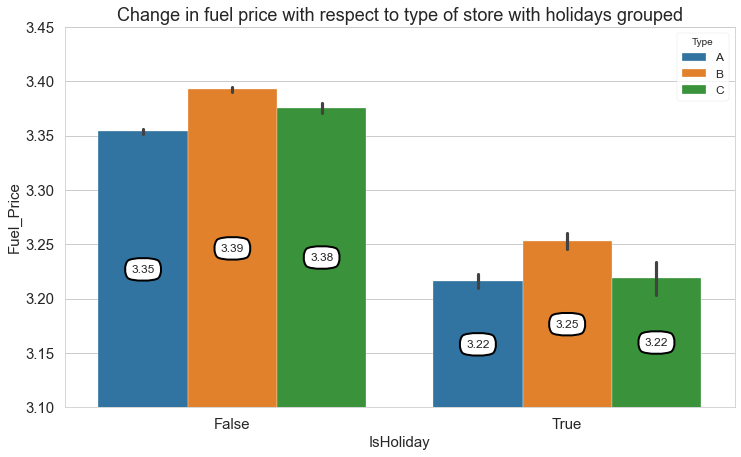

In [12]:
plt.subplots(figsize = (12,7))
plt.ylim(3.1,3.45)
plots = sns.barplot(data = df, x = 'IsHoliday', y = 'Fuel_Price', hue = 'Type')
plt.title('Change in fuel price with respect to type of store with holidays grouped')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=12, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')

<AxesSubplot:xlabel='Date', ylabel='Fuel_Price'>

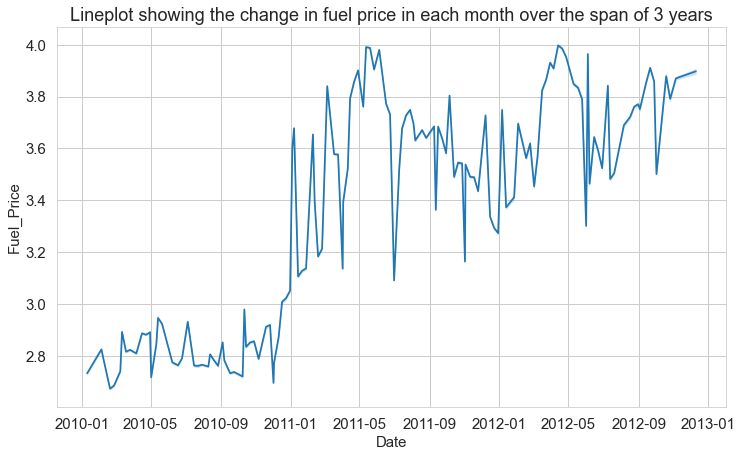

In [13]:
_ = plt.subplots(figsize = (12,7))
sns.lineplot(data = df, x = 'Date', y = 'Fuel_Price')
_ = plt.title('Lineplot showing the change in fuel price in each month over the span of 3 years')


(<Figure size 1080x576 with 1 Axes>, <AxesSubplot:>)

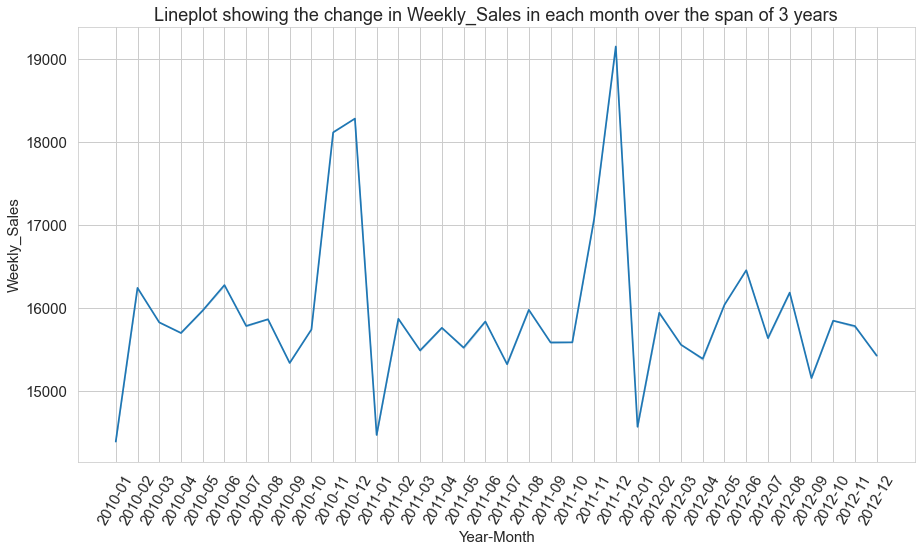

In [14]:
plt.subplots(figsize = (15,8))
_ = sns.lineplot(data = df, x = 'Year-Month', y = 'Weekly_Sales', ci = 1)
_ = plt.xticks(rotation = 60)
_ = plt.title('Lineplot showing the change in Weekly_Sales in each month over the span of 3 years')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:title={'center':'weekly sales'}, xlabel='Date'>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:title={'center':'trend'}, xlabel='Date'>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:title={'center':'seasonal'}, xlabel='Date'>

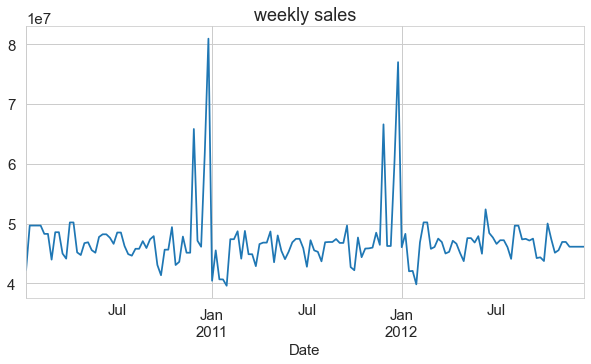

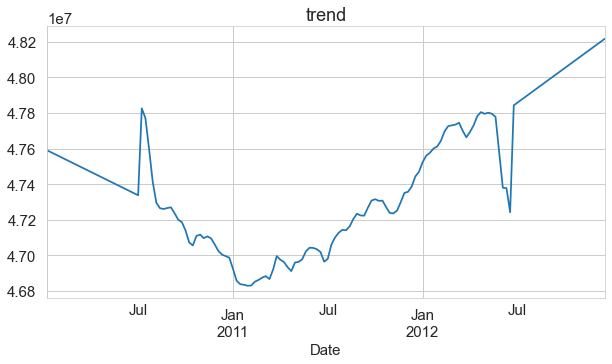

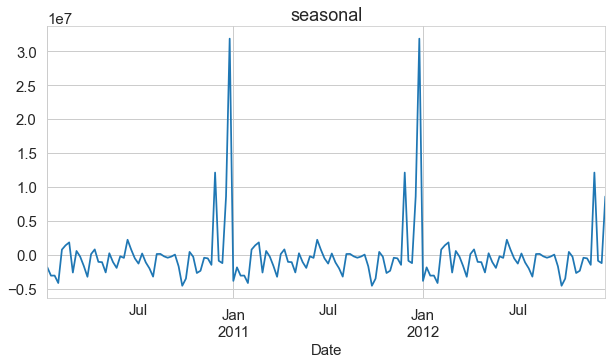

In [15]:
df_by_date = df.groupby('Date', as_index=False).agg({'Temperature': 'mean',
                                                        'Fuel_Price': 'mean',
                                                        'CPI': 'mean',
                                                        'Unemployment': 'mean', 
                                                        'Weekly_Sales': 'sum',
                                                        'IsHoliday': 'mean'})


df_by_date.Date = pd.to_datetime(df_by_date.Date, errors='coerce')
df_by_date.set_index('Date', inplace=True)


df_by_date_new = df_by_date.resample('W').mean().fillna(method='bfill')
multi_plot = seasonal_decompose(df_by_date_new['Weekly_Sales'], model = 'add', extrapolate_trend='freq')

plt.figure(figsize=(10,5))
multi_plot.observed.plot(title = 'weekly sales')

plt.figure(figsize=(10,5))
multi_plot.trend.plot(title = 'trend')

plt.figure(figsize=(10,5))
multi_plot.seasonal.plot(title = 'seasonal')


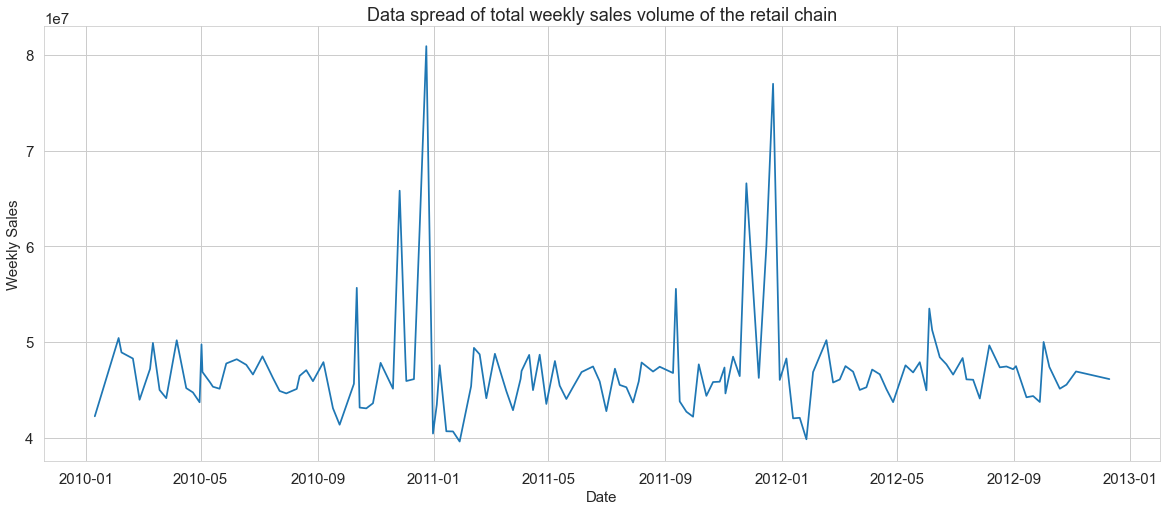

In [16]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

_ = plt.figure(figsize=(20,8))
_ = plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
_ = plt.title('Data spread of total weekly sales volume of the retail chain')
_ = plt.xlabel('Date')
_ = plt.ylabel('Weekly Sales')

In [17]:
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:5]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


/Users/namitagrawal/Desktop/env/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



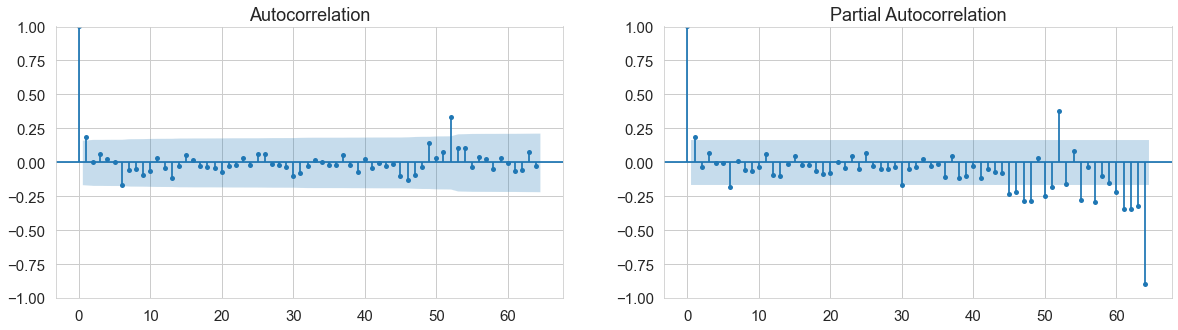

In [18]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
ts = df_average_sales_week.set_index('Date')
fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=64, ax=axes[0])
_ = plot_pacf(ts, lags=64, ax=axes[1])
plt.show()

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:120],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

prediction = fit_model.forecast(34)
prediction

/Users/namitagrawal/Desktop/env/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



2012-04-29    4.405326e+07
2012-05-06    4.838665e+07
2012-05-13    4.585137e+07
2012-05-20    4.444437e+07
2012-05-27    4.571815e+07
2012-06-03    4.724655e+07
2012-06-10    4.781845e+07
2012-06-17    4.781393e+07
2012-06-24    4.632123e+07
2012-07-01    4.336375e+07
2012-07-08    4.805711e+07
2012-07-15    4.586995e+07
2012-07-22    4.471480e+07
2012-07-29    4.457993e+07
2012-08-05    4.591640e+07
2012-08-12    4.594399e+07
2012-08-19    4.717923e+07
2012-08-26    4.608029e+07
2012-09-02    4.745680e+07
2012-09-09    4.800603e+07
2012-09-16    4.348969e+07
2012-09-23    4.158346e+07
2012-09-30    4.573661e+07
2012-10-07    4.599763e+07
2012-10-14    4.954104e+07
2012-10-21    4.343128e+07
2012-10-28    4.393695e+07
2012-11-04    4.803363e+07
2012-11-11    4.550724e+07
2012-11-18    4.543995e+07
2012-11-25    6.614618e+07
2012-12-02    4.743301e+07
2012-12-09    4.648392e+07
2012-12-16    6.212565e+07
Freq: W-SUN, dtype: float64

<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Weekly Sales (in millions)')

Text(0.5, 1.0, 'Weekly Sales Forecast')

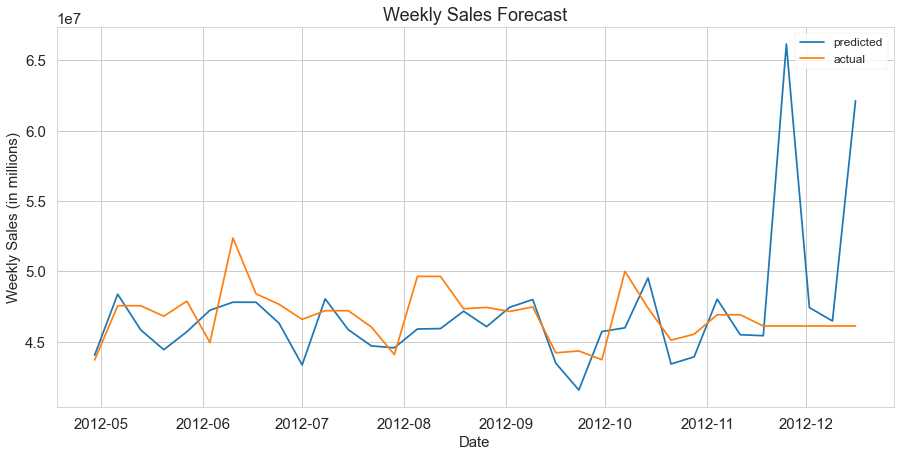

In [21]:
plt.figure(figsize=(15,7))
plt.plot(df_by_date_new.index[120:], prediction, label = 'predicted')
plt.plot(df_by_date_new.index[120:], df_by_date_new.Weekly_Sales[120:], label = 'actual')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Weekly Sales (in millions)")
plt.title("Weekly Sales Forecast")

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage Error = {a}%".format(a=mean_absolute_percentage_error(df_by_date_new.Weekly_Sales[120:],prediction)))

Mean Absolute Percentage Error = 5.588052125595333%


In [23]:
fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:-2],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

future_prediction = fit_model.forecast(56)
future_prediction

/Users/namitagrawal/Desktop/env/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



2012-12-09    4.565661e+07
2012-12-16    6.108623e+07
2012-12-23    7.990336e+07
2012-12-30    4.078039e+07
2013-01-06    4.500461e+07
2013-01-13    4.121536e+07
2013-01-20    4.114520e+07
2013-01-27    3.997257e+07
2013-02-03    4.679990e+07
2013-02-10    4.709320e+07
2013-02-17    4.806427e+07
2013-02-24    4.350177e+07
2013-03-03    4.752387e+07
2013-03-10    4.478560e+07
2013-03-17    4.425620e+07
2013-03-24    4.231238e+07
2013-03-31    4.575426e+07
2013-04-07    4.619369e+07
2013-04-14    4.560622e+07
2013-04-21    4.678353e+07
2013-04-28    4.290621e+07
2013-05-05    4.682887e+07
2013-05-12    4.472946e+07
2013-05-19    4.345342e+07
2013-05-26    4.475634e+07
2013-06-02    4.554085e+07
2013-06-09    4.700915e+07
2013-06-16    4.634749e+07
2013-06-23    4.496620e+07
2013-06-30    4.260496e+07
2013-07-07    4.627220e+07
2013-07-14    4.442091e+07
2013-07-21    4.330473e+07
2013-07-28    4.273575e+07
2013-08-04    4.480435e+07
2013-08-11    4.476428e+07
2013-08-18    4.534159e+07
2

<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Weekly Sales (in millions)')

Text(0.5, 1.0, 'Weekly Sales Forecast')

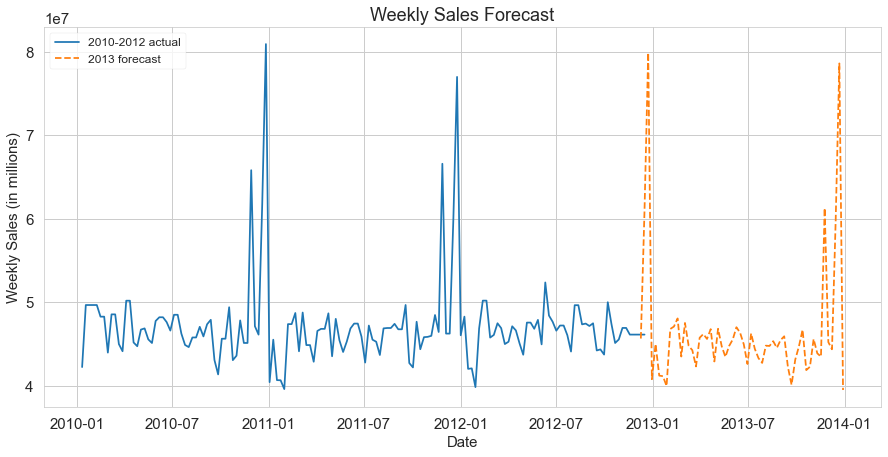

In [24]:
plt.figure(figsize=(15,7))
plt.plot(df_by_date_new.index, df_by_date_new.Weekly_Sales)
plt.plot(future_prediction, '--')
plt.legend(['2010-2012 actual', '2013 forecast'])
plt.xlabel("Date")
plt.ylabel("Weekly Sales (in millions)")
plt.title("Weekly Sales Forecast")

In [58]:
df_by_store_date = df.groupby(['Store', 'Date'], as_index=False).agg({'Temperature': 'mean',
                                                        'Fuel_Price': 'mean',
                                                        'CPI': 'mean',
                                                        'Unemployment': 'mean', 
                                                        'Weekly_Sales': 'sum',
                                                        'IsHoliday': 'mean'})
df_by_store_date.Date = pd.to_datetime(df_by_store_date.Date, errors='coerce')

In [59]:
df_by_store_date

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday
0,1,2010-01-10,71.89,2.603,211.671989,7.838,1453329.50,0.0
1,1,2010-02-04,62.27,2.719,210.820450,7.808,1594968.28,0.0
2,1,2010-02-07,80.91,2.669,211.223533,7.787,1492418.14,0.0
3,1,2010-02-19,39.93,2.514,211.289143,8.106,1611968.17,0.0
4,1,2010-02-26,46.63,2.561,211.319643,8.106,1409727.59,0.0
...,...,...,...,...,...,...,...,...
6430,45,2012-10-08,78.65,3.722,191.162613,8.684,733037.32,0.0
6431,45,2012-10-19,56.47,3.969,192.330854,8.667,718125.53,0.0
6432,45,2012-10-26,58.85,3.882,192.308899,8.667,760281.43,0.0
6433,45,2012-11-05,61.24,3.889,190.976417,8.567,770487.37,0.0


In [90]:
def fitHoltsWinter(df):
    fit_model = ExponentialSmoothing(df['Weekly_Sales'][:120],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

    prediction = fit_model.forecast(34)
#     print(df.Weekly_Sales[120:].shape, prediction.shape)
    return mean_absolute_percentage_error(df.Weekly_Sales[120:],prediction)
#     fit_model = ExponentialSmoothing(df_by_date_new['Weekly_Sales'][:-2],
#                                  trend = 'add',
#                                  seasonal = 'add',
#                                  seasonal_periods = 52).fit()

#     return fit_model
    

In [91]:
mapes = []
for store_number in range(1, 46):
    df_sample_store = df_by_store_date[df_by_store_date['Store'] == store_number]
    df_sample_store.set_index('Date', inplace=True)
    

    df_sample_store = df_sample_store.resample('W').mean().fillna(method='bfill')
    mape = fitHoltsWinter(df_sample_store)
    print("Mean Absolute Percentage Error = {a} Store Number: {b}".format(a=mape, b=store_number))

    mapes.append(mape)

Mean Absolute Percentage Error = 6.955614894173709 Store Number: 1
Mean Absolute Percentage Error = 6.888983330261982 Store Number: 2
Mean Absolute Percentage Error = 8.55921938290881 Store Number: 3
Mean Absolute Percentage Error = 6.266397882621293 Store Number: 4
Mean Absolute Percentage Error = 8.387006675705729 Store Number: 5
Mean Absolute Percentage Error = 8.686780706611032 Store Number: 6
Mean Absolute Percentage Error = 14.325112185530061 Store Number: 7
Mean Absolute Percentage Error = 7.146509338544675 Store Number: 8
Mean Absolute Percentage Error = 6.466257841538351 Store Number: 9
Mean Absolute Percentage Error = 9.688688836874123 Store Number: 10
Mean Absolute Percentage Error = 7.419597041620028 Store Number: 11
Mean Absolute Percentage Error = 9.562349057392757 Store Number: 12
Mean Absolute Percentage Error = 6.1870122026869065 Store Number: 13
Mean Absolute Percentage Error = 12.764132746842302 Store Number: 14
Mean Absolute Percentage Error = 11.239198056463765 Sto

In [72]:
mapes = np.array(mapes)

In [79]:
lowest_mape = np.argmin(mapes)
highest_mape = np.argmax(mapes)
print(lowest_mape + 1, highest_mape + 1)

44 35


In [81]:
df_sample_store_min = df_by_store_date[df_by_store_date['Store'] == lowest_mape + 1]
df_sample_store_min.set_index('Date', inplace=True)


df_sample_store_min = df_sample_store_min.resample('W').mean().fillna(method='bfill')

df_sample_store_max = df_by_store_date[df_by_store_date['Store'] == highest_mape + 1]
df_sample_store_max.set_index('Date', inplace=True)


df_sample_store_max = df_sample_store_max.resample('W').mean().fillna(method='bfill')


<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Weekly Sales ')

Text(0.5, 1.0, 'Weekly Sales Forecast for Store 44')

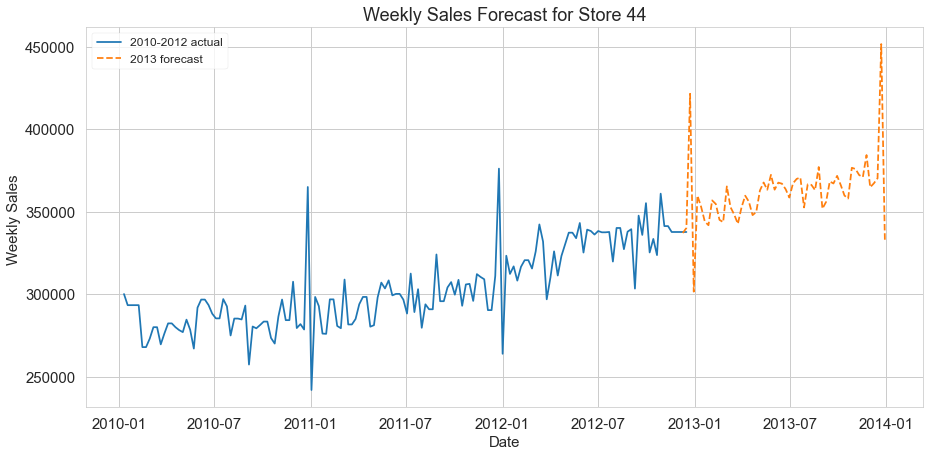

In [93]:
fit_model = ExponentialSmoothing(df_sample_store_min['Weekly_Sales'][:-2],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

future_prediction = fit_model.forecast(56)

plt.figure(figsize=(15,7))
plt.plot(df_sample_store_min.index, df_sample_store_min.Weekly_Sales)
plt.plot(future_prediction, '--')
plt.legend(['2010-2012 actual', '2013 forecast'])
plt.xlabel("Date")
plt.ylabel("Weekly Sales ")
plt.title("Weekly Sales Forecast for Store 44")

<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Weekly Sales (in millions)')

Text(0.5, 1.0, 'Weekly Sales Forecast for Store 35')

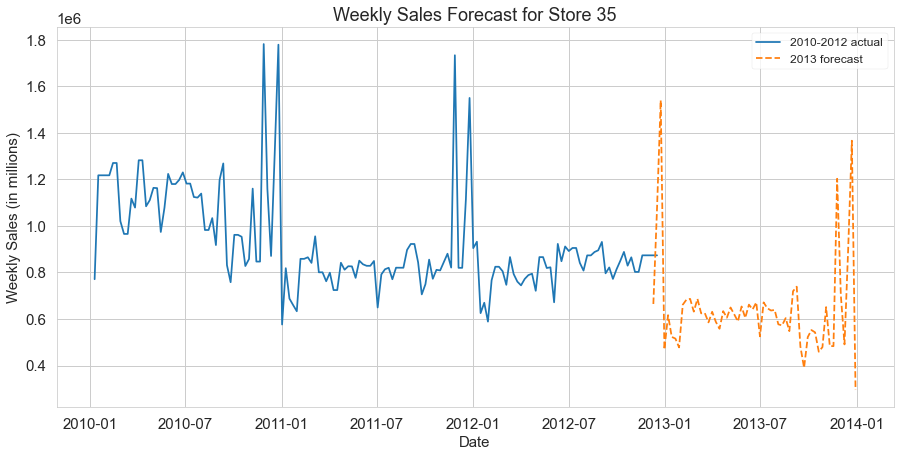

In [88]:
fit_model = ExponentialSmoothing(df_sample_store_max['Weekly_Sales'][:-2],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

future_prediction = fit_model.forecast(56)

plt.figure(figsize=(15,7))
plt.plot(df_sample_store_max.index, df_sample_store_max.Weekly_Sales)
plt.plot(future_prediction, '--')
plt.legend(['2010-2012 actual', '2013 forecast'])
plt.xlabel("Date")
plt.ylabel("Weekly Sales (in millions)")
plt.title("Weekly Sales Forecast for Store 35")

<Figure size 1080x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Weekly Sales (in millions)')

Text(0.5, 1.0, 'Weekly Sales Forecast for Store 20')

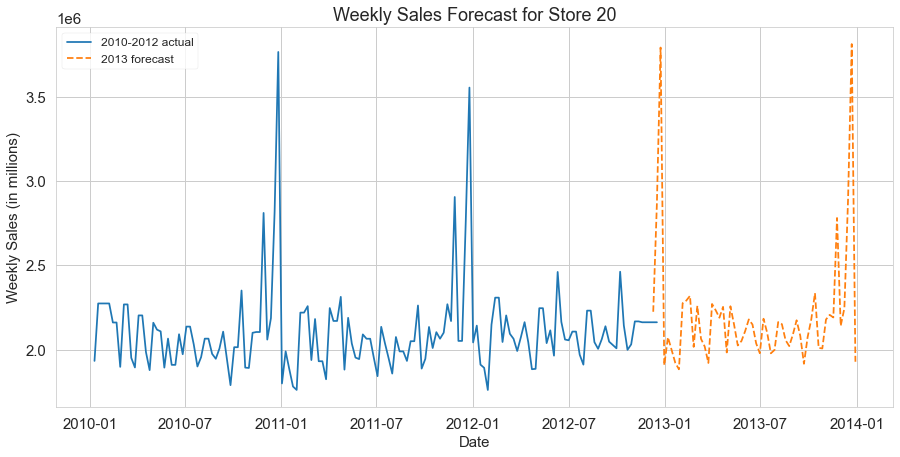

In [92]:
df_sample_store_top = df_by_store_date[df_by_store_date['Store'] == 20]
df_sample_store_top.set_index('Date', inplace=True)


df_sample_store_top = df_sample_store_top.resample('W').mean().fillna(method='bfill')

fit_model = ExponentialSmoothing(df_sample_store_top['Weekly_Sales'][:-2],
                                 trend = 'add',
                                 seasonal = 'add',
                                 seasonal_periods = 52).fit()

future_prediction = fit_model.forecast(56)

plt.figure(figsize=(15,7))
plt.plot(df_sample_store_top.index, df_sample_store_top.Weekly_Sales)
plt.plot(future_prediction, '--')
plt.legend(['2010-2012 actual', '2013 forecast'])
plt.xlabel("Date")
plt.ylabel("Weekly Sales (in millions)")
plt.title("Weekly Sales Forecast for Store 20")